<a href="https://colab.research.google.com/github/ijjuManjula-11/CODSOFT/blob/main/analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARKET BASKET DATA OPTIMIZATION

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df=pd.read_csv('Market.csv')
df.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [ ]:
df.fillna("",axis=1,inplace=True)
df.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
1,chutney,,,,,,,,,,,,,,,,,,,
2,turkey,avocado,,,,,,,,,,,,,,,,,,
3,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
4,low fat yogurt,,,,,,,,,,,,,,,,,,,


Converting the data inot a lists of lists where each inner list represented a transaction

In [ ]:
df_list=df.to_numpy( ).tolist()
df_list
dataset=list()
for i in range(len(df_list)):
   item=list()
   for j in range(len(df_list[i])):
    if pd.notna(j):
      item.append([j])
      dataset.append(item)

Transaction Encoder to convert our lists of lists

In [ ]:
!pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# ... (previous code to create 'df_list')

dataset = []
for row in df_list:
    items = [item for item in row if pd.notna(item)]
    dataset.append(items)  # Append a list of items, not a list of lists

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True, False]])

In [ ]:
final_df=pd.DataFrame(te_ary,columns=te.columns_)
final_df.drop(columns=["honey"],axis=1,inplace=True)
final_df

,,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,...,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

Apriori Algorithm ---Support count

In [ ]:
freq_items=apriori(final_df,min_support=0.01,use_colnames=True)
freq_items.head()

,support,itemsets
0,1.000000,()
1,0.020267,(almonds)
2,0.033200,(avocado)
3,0.010800,(barbecue sauce)
4,0.014267,(black tea)


In [ ]:
rules_ap=association_rules(freq_items,metric="confidence",min_threshold=0.5)
result=pd.DataFrame(rules_ap)
result.sort_values(by="lift",inplace=True,ascending=False)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
239,"(ground beef, eggs)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
247,"(, ground beef, eggs)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
249,"(ground beef, eggs)","(, mineral water)",0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
240,"(ground beef, milk)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177
257,"(ground beef, milk)","(, mineral water)",0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177
...,...,...,...,...,...,...,...,...,...,...
92,"(cake, milk)",(),0.013333,1.000000,0.013333,1.000000,1.000000,0.000000,inf,0.000000
93,"(mineral water, cake)",(),0.027467,1.000000,0.027467,1.000000,1.000000,0.000000,inf,0.000000
94,"(pancakes, cake)",(),0.011867,1.000000,0.011867,1.000000,1.000000,0.000000,inf,0.000000
95,"(spaghetti, cake)",(),0.018133,1.000000,0.018133,1.000000,1.000000,0.000000,inf,0.000000


giving visualization of avocado sale


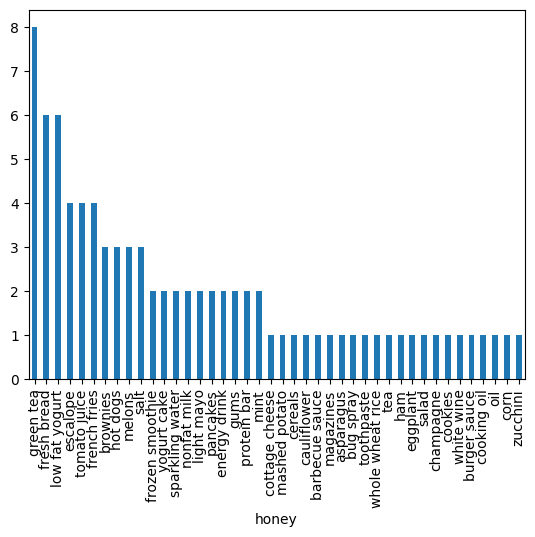

In [ ]:
import matplotlib.pyplot as plt
df['honey'].value_counts().plot(kind='bar')
plt.show()